#Oscilador lineal ideal
Masa resorte amortiguador


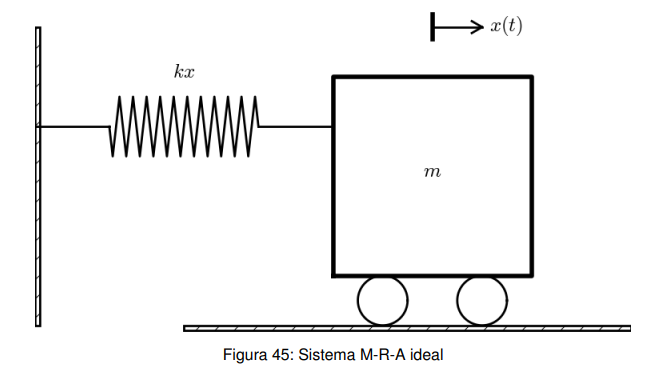



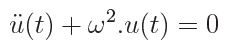

## Método de Euler vs solución exacta
mra.py

2.0
28.06339883959285


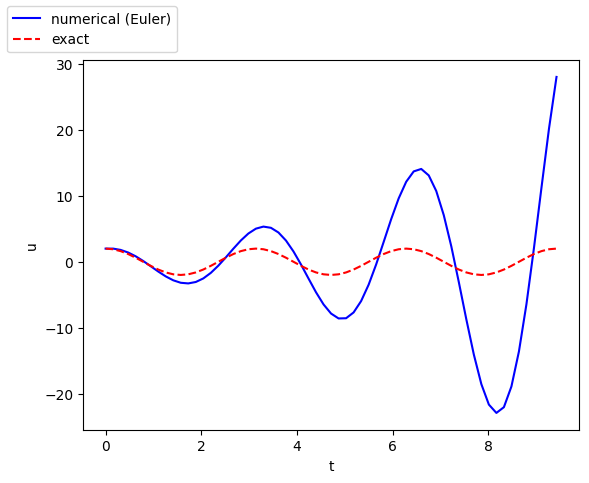

In [ ]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2
P = 2*pi/omega #periodo
dt = P/20 #2000   # subintervalo, cambiamos el ancho de los subintervalos en delta_t
T = 3*P  #10 periodo
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1) #tiempo


# creamos dos arreglos con ceros, que corresponden al desplazamiento y velocidad
u = zeros(N_t+1)
v = zeros(N_t+1)

# Establecemos las condiciones inciales
u_0 = 2 #posicion inicial desde donde se suelta la masa
u[0] = u_0 #en t=0; posicion inicial Uo
v[0] = 0 #velocidad en la posicion inicial es cero, porque la masa esta quieta

#
#Calulo el desplazamiento y la velocidad y vuelvo a calcularla para el otro t
#cuando termine de ciclar voy a tener:
#- un vector que contendrá todos los desplaz. a lo largo del tiempo
#- y otro vector con todas las veloc (son las ecuaciones de Euler)
for n in range(N_t):
    u[n+1] = u[n] + dt*v[n]
    v[n+1] = v[n] - dt*omega**2*u[n]


print(u[0])
print(u[-1])

#diagrama de elongacion
fig = plt.figure()
l1, l2 = plt.plot(t, u, 'b-', t, u_0*cos(omega*t), 'r--') #l1: Euler; l2:solución exacta
fig.legend([l1,l2],['numerical (Euler)', 'exact'],loc='upper left')
plt.xlabel('t')
plt.ylabel('u')
plt.show()

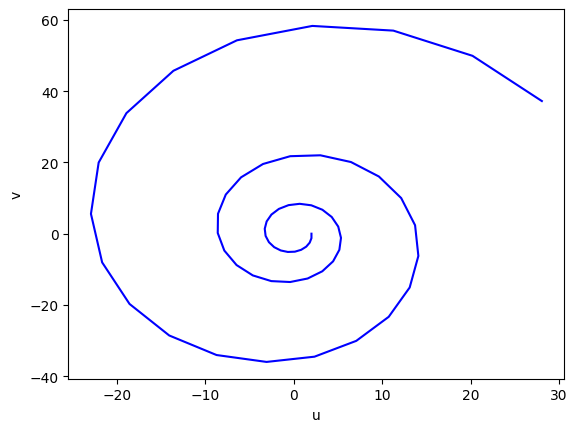

In [ ]:
#diagrama de fase
plt.clf()
l3 = plt.plot(u, v, 'b-')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

Si disminuimos el ancho de los intervalos, el resultado es más exacto.\
Si aumentamos la cantidad de periodos simulados, la amplitud aumenta.\
Por lo tanto, se obtenienen buenos resultados, simulando pocos periodos con dt pequeños.  

## Método de Euler- Cromer

<ipython-input-3-19061a09be3a>:31: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')


Text(0.5, 0, 'u')

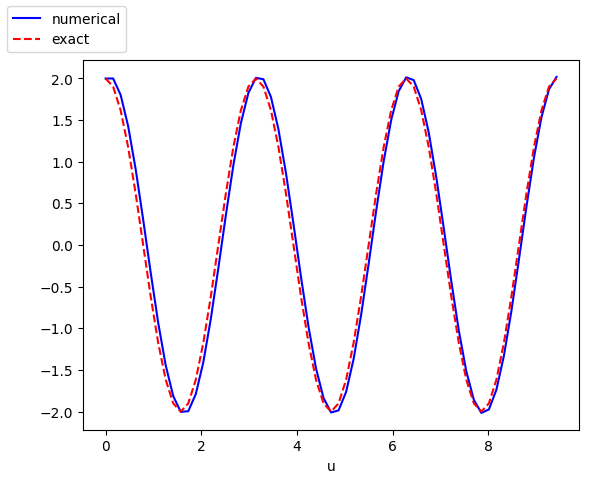

In [ ]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2
P = 2*pi/omega #periodo
dt = P/20 #2000   # intervalo cambiamos el ancho de los intervalos en delta_t
T = 3*P  #10 periodo
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1) #tiempo

u = zeros(N_t+1) #rreglos de ceros
v = zeros(N_t+1)

# Initial condition
X_0 = 2 #posicion inicial desde donde se estira la masa y se suelta
u[0] = X_0 #en t=0; posicion inicial
v[0] = 0 #velocidad en la posicion inicial es cero porque esta quieta

# Step equations forward in time. Calulo el desplazamiento
#y la velocidad y vuelvo a calcularla para el otro t
#cuando termine de ciclar voy a tener un vector que contendrá todos los desplaz a lo largo del timepo
#y otro con todas las veloc. Son las ecuaciones de reordenando
for n in range(N_t):
    u[n+1] = u[n] + dt*v[n]
    v[n+1] = v[n] - dt*omega**2*u[n+1]

fig = plt.figure()

#diagrama de elongacion
l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--') #omega fecuencia
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('u')



Text(0, 0.5, 'v')

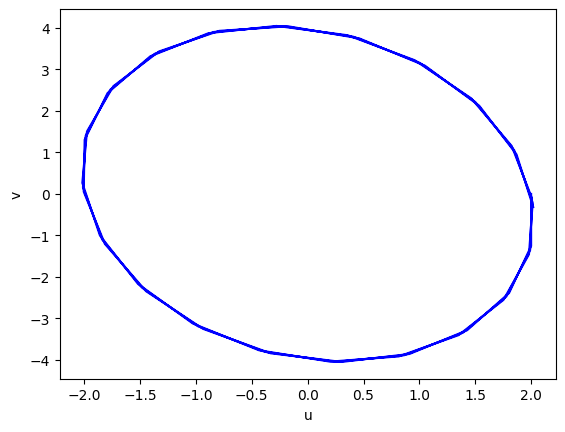

In [ ]:
#diagrama de fase
plt.clf()
l3 = plt.plot(u, v, 'b-')
plt.xlabel('u')
plt.ylabel('v')

##Incorporamos efectos físicos como la fuerza de amortiguación

# mra1.py

N_t: 5000


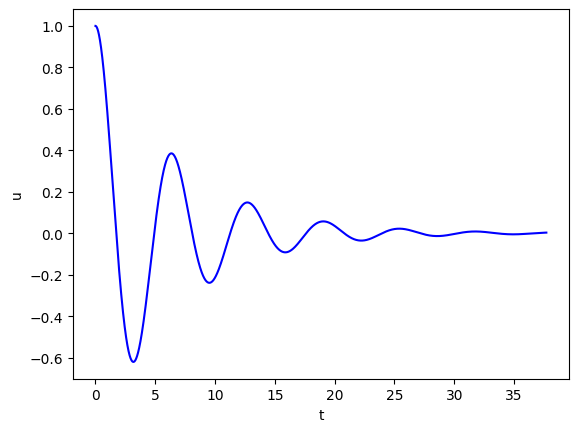

In [ ]:
from matplotlib.pyplot import plot, legend, xlabel, ylabel, savefig, title, figure, show, clf
from numpy import pi,zeros, linspace

def EulerCromer(f, s, F, m, T, U_0, V_0, dt):
    """
    Calcula toda la serie de valores de u y v con diferencias hacia adelante y atrás respectivamente.
    f:  Función de fuerza de amortiguación
    s:  Función de fuerza de restauración (resorte)
    m:  Masa
    T:  Periodo
    U_0: Desplazamiento Inicial
    V_0: Velocidad inicial
    dt: amplitud de tiempo / muestreo
    """

    # calculamos el tiempo final para las iteraciones
    N_t = int(round(T/dt))
    print('N_t:', N_t)

    # generamos la lista de tiempos muestreados
    t = linspace(0, N_t*dt, N_t+1)

    # creamos dos listas, desplazamiento y velocidad, vacías
    u = zeros(N_t+1)
    v = zeros(N_t+1)

    # Cargamos las condiciones inciales
    u[0] = U_0
    v[0] = V_0

    # Calculamos los nuevos valores: dte un tiempo definido
    for n in range(N_t):
        v[n+1] = v[n] + dt*(1./m)*(F(t[n]) - f(v[n]) - s(u[n]))
        u[n+1] = u[n] + dt*v[n+1]
    return u, v, t

def plot_elong(u, t, percentage=100, heading='', labels=('t', 'u')):
    clf()
    index = len(u)*percentage/100.
    plot(t[int(-index):], u[int(-index):], 'b-' )
    xlabel(labels[0]);  ylabel(labels[1])
    title(heading)

def plot_fase(v, u, percentage=100, heading='', labels=('u', 'v')):
    clf()
    index = len(v)*percentage/100.
    plot(u[int(-index):], v[int(-index):], 'b-' )
    xlabel(labels[0]);  ylabel(labels[1])
    title(heading)

def linear_damping(): #No tiene fuerza externa
    b = 0.3
    f = lambda v: b*v       # fuerza de amortiguacion (cte. de amortiguación por veloc)
    s = lambda u: k*u       # fuerza del resorte
    F = lambda t: 0         # Fuerza externa nula

    m = 1
    k = 1
    U_0 = 1                 #desplazamiento inicial
    V_0 = 0                 #veloc. inicial

    T = 12*pi
    dt = T/5000.

    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)
    plot_elong(u, t)
  #  plot_fase(v, u)

def linear_damping_sine_excitation():#con fuerza externa
    b = 0.3
    f = lambda v: b*v
    s = lambda u: k*u
    from math import pi, sin, cos
    w = 3
    A = 0.5
    F = lambda t: A*sin(w*t) #original
  #  F = lambda t: A*sin(t)

    m = 1
    k = 1
    U_0 = 1
    V_0 = 0

    T = 12*pi
#    T = 34*pi
    dt = T/5000  #5000.

    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)
    plot_elong(u, t)
  #  plot_fase(v, u)

def sliding_friction(): #amortiguación NL
    from numpy import tanh, sign

    f = lambda v: mu*m*g*sign(v)    # está en funcion de la velocidad
    alpha = 60.0
    s = lambda u: k/alpha*tanh(alpha*u) # esta funcion se utiliza para modelar la fuerza de amortiguación no lineal
    #   s = lambda u: k*u
    F = lambda t: 0

    g = 9.81
    mu = 0.4
    m = 1 #0.1
    k = 1000

    U_0 = 0.1
    V_0 = 0

    T = 2
    dt = T/5000.

    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)
    plot_elong(u, t)
   # plot_fase(v, u)

if __name__ == '__main__':
    linear_damping() #sistema lineal sin exitacion externa
    #linear_damping_sine_excitation() #con exitación senioidal
   # sliding_friction() #fricción por rozamiento NL


https://jamboard.google.com/d/1pKqJL5NRBT-RZK2xqvJDG4t8jdc0W0rDZQC4oN84sOE/viewer?f=0